In [47]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



### Loading data set. 

In [50]:
### Loading dataset. 
df = pd.read_csv('Data/CarPrice.csv')
y = df['price']
X_lin = df[['horsepower', 'price']]
X = df['horsepower']
df.head()


,CarName,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,2548,130,111,5000,21,27,13495.0
1,alfa-romero stelvio,2548,130,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,2823,152,154,5000,19,26,16500.0
3,audi 100 ls,2337,109,102,5500,24,30,13950.0
4,audi 100ls,2824,136,115,5500,18,22,17450.0


### Cost function : $C =  \frac{1}{n} \sum_{i=1}^{n} (y_{pred}-y)^2$ 

In [52]:
#y_pred = ax + b. Initialize a,b = 0.
a, b = 0,0
#Set n to len(y) if len(y) is equal to len(X). 
n = (0, len(y))[len(y)==len(X)]

### $ \frac{\partial C}{\partial b}=  \frac{2}{n} \sum_{i=1}^{n} (y_{pred}-y) $ 
### $ \frac{\partial C}{\partial a}=  \frac{2}{n} \sum_{i=1}^{n} x_i*(y_{pred}-y) $ 


In [54]:
#Num of cycles (epochs)
cycles = 50000
for i in range(cycles):
    y_pred = a*X + b  # The current predicted value of Y
    delCdela = (-2/n) * sum(X * (y - y_pred))  # partial derivative of cost function wrt b (intercept)
    delCdelb = (-2/n) * sum(y - y_pred)  # partial derivative of cost function wrt a (slope)
    #Appropriate learning rates depending on the scale of the variables. 
    a = a - 0.000001* delCdela # Update slope (a)
    b = b - 0.001 * delCdelb  # Update intercept (b)



In [56]:
    print(f"Converged a(slope): {a}, b(intercept):{b}")


Converged a(slope): 163.26273251416316, b(intercept):-3721.7227571440408


### Train linear model using sklearn to confirm.

In [58]:
X_lin = X.values.reshape(-1, 1)
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_lin,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(f"linear model a(slope):{lin_mod.coef_}, b(intercept): {lin_mod.intercept_}")

linear model a(slope):[163.26306097], b(intercept): -3721.7614943227563


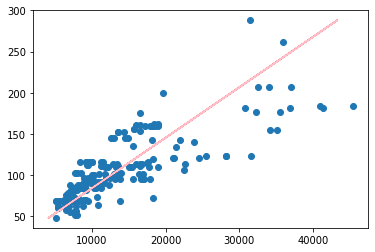

In [60]:
#y pred from gradient descent. 
y_pred = a*X + b

#y pred from lin model. 
y_pred_lin = lin_mod.predict(X_lin)


plt.scatter(y,X) 
plt.plot(y_pred, X, color = 'red')
plt.plot(y_pred_lin, X, color = 'pink')

plt.show()

In [65]:
print(f"MSE of gradient descent model: {mean_squared_error(y,y_pred)}")

MSE of gradient descent model: 22032509.702498417


In [66]:
print(f"MSE of sklearn linear model: {mean_squared_error(y,y_pred_lin)}")


MSE of sklearn linear model: 22032509.70230993


### The mean squared error are similar and thus our implementation is correct. 